In [9]:
# notebook last tested with abtem version 1.0.0beta6

from abtem import __version__
print('current version:', __version__)

from abtem.waves import PlaneWave
from abtem.dft import GPAWPotential
from abtem.transfer import CTF
from abtem.plot import show_atoms

from ase.io import read
from gpaw import GPAW

current version: 1.0.0beta6


# HRTEM simulation with GPAW potential

In [2]:
# Need converged calculator, this would usually be imported

atoms = read('data/hexagonal_graphene.cif')

gpaw = GPAW(h=.1, txt=None, kpts=(3,3,1))
atoms.calc = gpaw
atoms.get_potential_energy()

-19.68456129991716

In [3]:
potential = GPAWPotential(gpaw, sampling=.03).build()

In [4]:
wave = PlaneWave(
    energy=60e3 # acceleration voltage in eV
)

exit_wave = wave.multislice(potential)

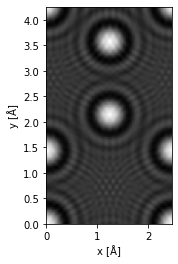

In [5]:
exit_wave.show()

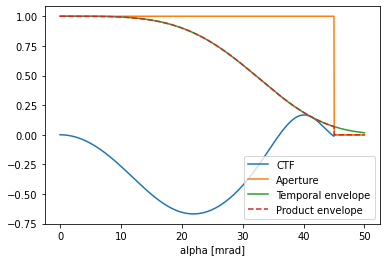

In [6]:
# See https://abtem.readthedocs.io/en/latest/walkthrough/05_contrast_transfer_function.html for parameter names

ctf = CTF(
    energy = wave.energy,
    semiangle_cutoff = 45, # mrad
    focal_spread = 25, # Å
    defocus = -45.46, # Å
    Cs = -7e-6 * 1e10, # Å
)

ctf.show(50)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x1321692e8>)

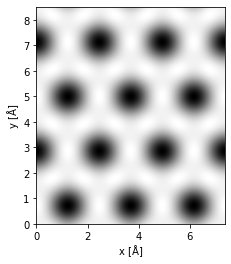

In [7]:
image_wave = exit_wave.apply_ctf(ctf)

image_wave.intensity().tile((3,2)).show()

In [8]:
# get image intensity as array

image_wave.intensity().array

array([[1.0292131, 1.0292273, 1.0292739, ..., 1.0292151, 1.0292248,
        1.0292177],
       [1.029223 , 1.0292292, 1.0292677, ..., 1.0292463, 1.0292491,
        1.029235 ],
       [1.0292516, 1.0292342, 1.0292478, ..., 1.0293384, 1.0293212,
        1.029286 ],
       ...,
       [1.0292943, 1.0292381, 1.0292104, ..., 1.0294862, 1.0294362,
        1.0293658],
       [1.0292513, 1.0292342, 1.0292479, ..., 1.0293379, 1.029321 ,
        1.0292857],
       [1.029223 , 1.0292292, 1.0292677, ..., 1.0292461, 1.0292491,
        1.0292348]], dtype=float32)